# Machine Learning Part 2
This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [28]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [29]:
# importing dataframes

path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/E-COMMERCE'

# Try different encodings if 'ISO-8859-1' doesn't work
encoding_type = 'ISO-8859-1'
df = pd.read_csv(os.path.join(path,'fact_table.csv'), index_col=False)
df_customer = pd.read_csv(os.path.join(path, 'customer_dim.csv'), index_col=False, encoding=encoding_type)
df_item = pd.read_csv(os.path.join(path, 'item_dim.csv'), index_col=False, encoding=encoding_type)
df_store = pd.read_csv(os.path.join(path, 'store_dim.csv'), index_col=False, encoding=encoding_type)
df_time = pd.read_csv(os.path.join(path,'time_dim.csv'), index_col=False)
df_trans = pd.read_csv(os.path.join(path,'Trans_dim.csv'), index_col=False)


In [30]:
df.head(10)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.00,35.00
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.00,26.00
2,P030,C007261,T03633,I00195,S00496,8,ct,12.50,100.00
3,P032,C007048,T084631,I00131,S0086,8,ct,14.00,112.00
4,P014,C006430,T071276,I00050,S00488,8,cans,8.00,64.00
5,P006,C007574,T026950,I00058,S00328,5,bottles,22.00,110.00
6,P023,C005695,T096704,I00075,S00196,2,cans,15.50,31.00
7,P027,C008728,T010756,I00188,S0010,1,ct,14.00,14.00
8,P025,C002764,T017598,I00017,S00164,11,cans,6.75,74.25
9,P019,C003128,T048812,I00133,S00640,10,ct,15.00,150.00


In [31]:
merged_data = pd.merge(df, df_item, on='item_key', how='inner')
merged_data = pd.merge(merged_data, df_store, on='store_key', how='inner')


In [32]:
merged_data.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit_x', 'unit_price_x', 'total_price', 'item_name',
       'desc', 'unit_price_y', 'man_country', 'supplier', 'unit_y', 'division',
       'district', 'upazila'],
      dtype='object')

In [33]:
merged_data.shape

(1000000, 18)

In [34]:
merged_data.head(10)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit_x,unit_price_x,total_price,item_name,desc,unit_price_y,man_country,supplier,unit_y,division,district,upazila
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
1,P016,C004747,T085858,I00177,S00307,7,ct,35.0,245.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
2,P018,C005717,T038791,I00177,S00307,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
3,P022,C006906,T075788,I00177,S00307,11,ct,35.0,385.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
4,P031,C000739,T091962,I00177,S00307,10,ct,35.0,350.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
5,P025,C003692,T037704,I00177,S00307,4,ct,35.0,140.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
6,P005,C005381,T041408,I00177,S00307,5,ct,35.0,175.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
7,P029,C007548,T092868,I00177,S00307,9,ct,35.0,315.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
8,P015,C002899,T024126,I00177,S00307,6,ct,35.0,210.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,35.0,Netherlands,Bolsius Boxmeer,ct,DHAKA,JAMALPUR,ISLAMPUR
9,P038,C004401,T097402,I00248,S00307,9,rolls,26.0,234.0,Charmin Ultra Bath Tissue,Kitchen Supplies,26.0,Bangladesh,DENIMACH LTD,rolls,DHAKA,JAMALPUR,ISLAMPUR


In [35]:
# Rename the columns

merged_data.rename(columns = {'coustomer_key' : 'customer_key', }, inplace = True)

In [36]:
# Specify the columns to be dropped
columns_to_drop = ['district', 'upazila']

# Drop the columns in-place in the merged_data DataFrame
merged_data.drop(columns=columns_to_drop, inplace=True)


In [37]:
merged_data.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit_x', 'unit_price_x', 'total_price', 'item_name',
       'desc', 'unit_price_y', 'man_country', 'supplier', 'unit_y',
       'division'],
      dtype='object')

In [38]:
# Rename the columns
merged_data.rename(columns = {'unit_price_y' : 'unit_price', }, inplace = True)

In [39]:
# Specify the columns to be dropped
columns_to_drop = ['unit_x', 'unit_y']

# Drop the columns in-place in the merged_data DataFrame
merged_data.drop(columns=columns_to_drop, inplace=True)


In [40]:
merged_data.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit_price_x', 'total_price', 'item_name', 'desc',
       'unit_price', 'man_country', 'supplier', 'division'],
      dtype='object')

In [41]:
merged_data.shape

(1000000, 14)

In [42]:
# Specify the columns to be dropped
columns_to_drop = [ 'payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
 'item_name', 'desc',
        'man_country', 'supplier', 'division']

# Drop the columns in-place in the merged_data DataFrame
merged_data.drop(columns=columns_to_drop, inplace=True)


In [44]:
# Specify the columns to be dropped
columns_to_drop = [ 'unit_price_x']

# Drop the columns in-place in the merged_data DataFrame
merged_data.drop(columns=columns_to_drop, inplace=True)


In [45]:
merged_data.columns

Index(['quantity', 'total_price', 'unit_price'], dtype='object')

# Elbow technique

In [46]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [47]:
score = [kmeans[i].fit(merged_data).score(merged_data) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/malavica/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/malavica/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/malavica/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/malavica/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

[-6617966585.027742,
 -2795929658.1689916,
 -1272109351.71738,
 -777240752.5834389,
 -520528563.01874495,
 -383148622.9649126,
 -300245097.2189363,
 -241742432.342946,
 -201136396.99504822]

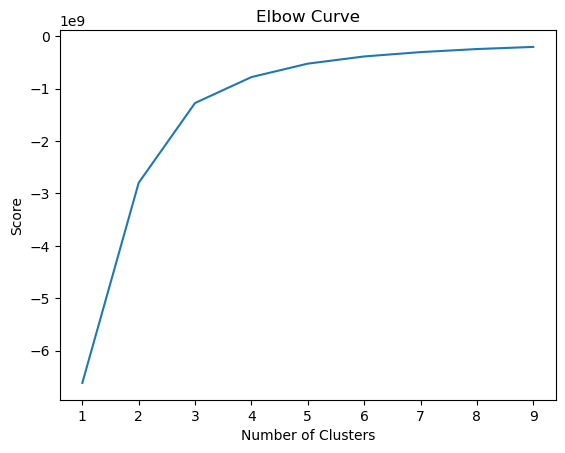

In [48]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# k-means clustering

In [49]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [50]:
# Fit the k-means object to the data.

kmeans.fit(merged_data)

/Users/malavica/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [51]:
merged_data['clusters'] = kmeans.fit_predict(merged_data)

/Users/malavica/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
merged_data.head()

,quantity,total_price,unit_price,clusters
0,1,35.0,35.0,1
1,7,245.0,35.0,3
2,10,350.0,35.0,2
3,11,385.0,35.0,2
4,10,350.0,35.0,2


In [53]:
merged_data['clusters'].value_counts()

clusters
1    436932
0    340990
3    190849
2     31229
Name: count, dtype: int64

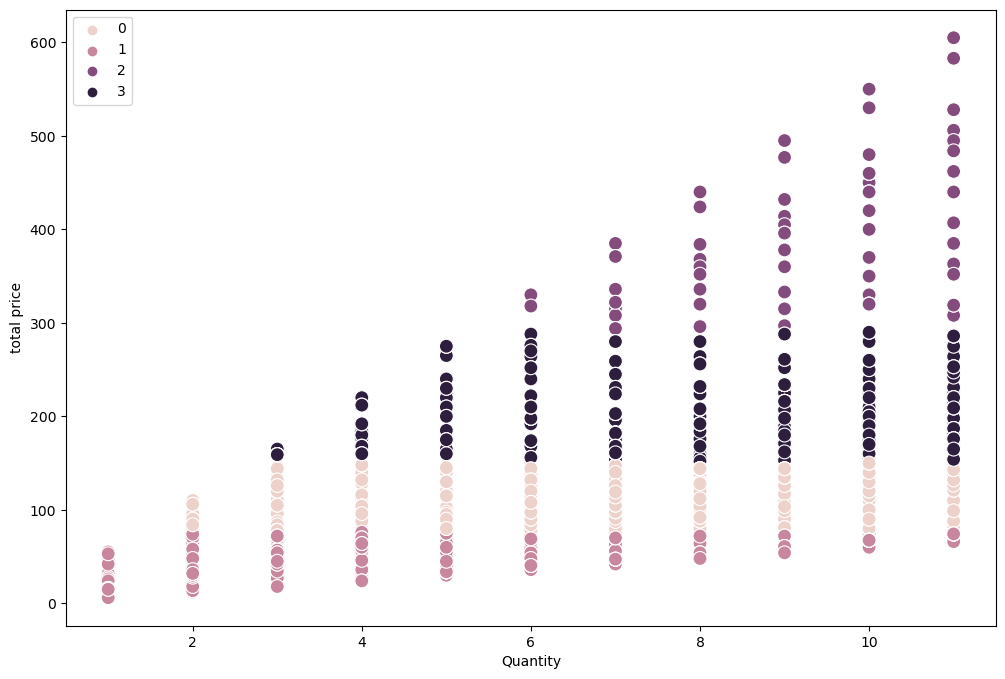

In [54]:
# Plot the clusters for the "Quantity " and "total_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=merged_data['quantity'], y=merged_data['total_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Quantity') # Label x-axis.
plt.ylabel('total price') # Label y-axis.
plt.show()

/Users/malavica/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


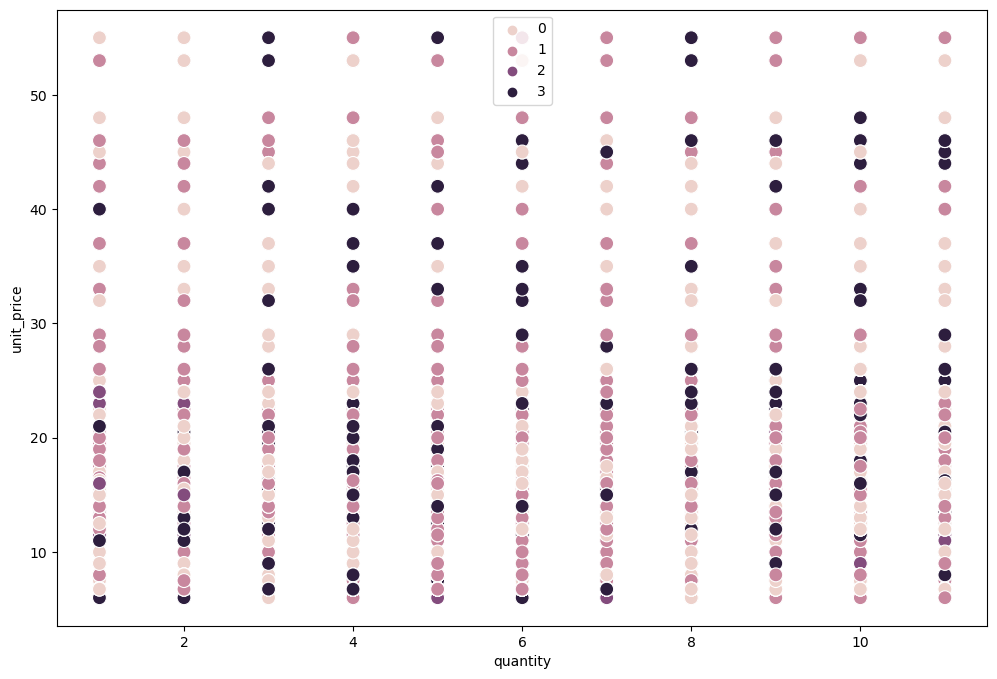

In [55]:
# Plot the clusters for the "unit_price" and "quantity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quantity'], y=df['unit_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('quantity') 
plt.ylabel('unit_price') 
plt.show()

In [56]:
merged_data.loc[merged_data['clusters'] == 2, 'cluster'] = 'dark purple'
merged_data.loc[merged_data['clusters'] == 1, 'cluster'] = 'purple'
merged_data.loc[merged_data['clusters'] == 0, 'cluster'] = 'pink'
merged_data.loc[merged_data['clusters'] == 3, 'cluster'] = 'light pink' 

In [57]:
merged_data.groupby('cluster').agg({'quantity':['mean', 'median'], 
                         'unit_price':['mean', 'median'], 
                         'total_price':['mean', 'median']})

quantity        unit_price        total_price       
                 mean median       mean median        mean median
cluster                                                          
dark purple  9.263313    9.0  43.016555   42.0  394.756060  384.0
light pink   9.143899   10.0  22.405037   20.0  191.639837  180.0
pink         7.093683    7.0  17.038516   16.0  111.886019  112.0
purple       3.540418    3.0  14.034896   14.0   41.991234   42.0

# Summary : Number of clusters are 4
The clustering is to segment the transactions into meaningful categories based on purchasing behavior:

High Value: 'Dark purple' 
high-value transactions with both high quantities and prices,possibly bulk purchases of premium products.

Moderate Value with Higher Quantities: 'Light pink' 
shows transactions where products are bought in moderate to high quantities but at lower prices than the high-value cluster, indicating a different consumer behavior focused on value.

Low Quantity, Low Price: 'Pink' 
represents smaller, less expensive purchases, which could be everyday items or low-cost necessities.

Lowest Overall Spend: 'Purple' 
suggests minimal transactions,likely impulse buys or essential items purchased singly or in very small quantities.


In [ ]:
# The clustering provides insightful segmentation of transactions based on purchasing patterns:

Premium vs. Economical Purchasing: 
The 'dark purple' and 'light pink' clusters differentiate between premium and economical purchasing behaviors, 
both in terms of quantity and unit price, but diverge significantly in the unit price of items purchased,
reflecting different consumer value perceptions or product categories.

Consistency in Low-Value Transactions: 
The 'pink' and 'purple' clusters highlight transactions that involve lower quantities and prices, 
possibly indicating different types of consumer needs, such as regular small purchases ('pink') versus minimal,
perhaps necessity-driven purchases ('purple').
